<h3>Forex Prediction Project

- 22 Different currencies (quoted in USD).
- ~5000 points per series.
- 3 different models to try on each set
- Write a pre-processing function for each model type that can be used on any of the 22 currencies (different models will require different degrees of pre-processing)

<h4>Data Import + Pre-clean + EDA

In [31]:
import pandas as pd
import numpy as np

# For importing the data:
import os
from pathlib import Path

In [32]:
cwd_path = Path.cwd()
data_dir = Path('data')
d_file_path = cwd_path / data_dir / 'Foreign_Exchange_Rates.xlsx'
raw_data = pd.read_excel(d_file_path)

In [33]:
raw_data.head(10)

,Unnamed: 0,Time Serie,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,...,SINGAPORE - SINGAPORE DOLLAR/US$,DENMARK - DANISH KRONE/US$,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$
0,0,2000-01-03,1.5172,0.9847,1.9033,0.6146,1.805,1.4465,8.2798,7.7765,...,1.6563,7.329,101.7,3.8,7.964,8.443,72.3,1.5808,31.38,36.97
1,1,2000-01-04,1.5239,0.97,1.9238,0.6109,1.8405,1.4518,8.2799,7.7775,...,1.6535,7.218,103.09,3.8,7.934,8.36,72.65,1.5565,30.6,37.13
2,2,2000-01-05,1.5267,0.9676,1.9339,0.6092,1.856,1.4518,8.2798,7.778,...,1.656,7.208,103.77,3.8,7.935,8.353,72.95,1.5526,30.8,37.1
3,3,2000-01-06,1.5291,0.9686,1.9436,0.607,1.84,1.4571,8.2797,7.7785,...,1.6655,7.2125,105.19,3.8,7.94,8.3675,72.95,1.554,31.75,37.62
4,4,2000-01-07,1.5272,0.9714,1.938,0.6104,1.831,1.4505,8.2794,7.7783,...,1.6625,7.2285,105.17,3.8,7.966,8.415,73.15,1.5623,30.85,37.3
5,5,2000-01-10,1.5242,0.9754,1.935,0.6107,1.819,1.4568,8.2794,7.7785,...,1.6618,7.254,105.28,3.8,8.024,8.449,73.3,1.5704,30.83,37.27
6,6,2000-01-11,1.5209,0.9688,1.9365,0.6068,1.8225,1.457,8.2795,7.7785,...,1.669,7.214,106.09,3.8,7.969,8.397,73.35,1.5605,30.83,37.61
7,7,2000-01-12,1.5202,0.9727,1.9286,0.6073,1.835,1.455,8.2796,7.7787,...,1.669,7.236,105.76,3.8,7.977,8.418,73.35,1.566,30.8,37.54
8,8,2000-01-13,1.4954,0.9737,1.9084,0.6067,1.814,1.4495,8.2798,7.7788,...,1.67,7.252,106.09,3.8,7.9425,8.417,73.35,1.5707,30.8,37.49
9,9,2000-01-14,1.5004,0.9874,1.9186,0.6115,1.805,1.4497,8.2797,7.7789,...,1.6752,7.347,105.86,3.8,7.997,8.474,73.35,1.5945,30.83,37.55


In [34]:
# Drop the 'Unnamed: 0' columnn and all columns except the five currencies we are interested in:
# [EURO AREA - EURO/US$, UNITED KINGDOM - UNITED KINGDOM POUND/US$, JAPAN - YEN/US$, CHINA - YUAN/US$, AUSTRALIA - AUSTRALIAN DOLLAR/US$]
data = raw_data[['Time Serie', 'EURO AREA - EURO/US$', 'UNITED KINGDOM - UNITED KINGDOM POUND/US$', 'JAPAN - YEN/US$', 'CHINA - YUAN/US$', 'AUSTRALIA - AUSTRALIAN DOLLAR/US$']]

In [35]:
data.head(15)

,Time Serie,EURO AREA - EURO/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,JAPAN - YEN/US$,CHINA - YUAN/US$,AUSTRALIA - AUSTRALIAN DOLLAR/US$
0,2000-01-03,0.9847,0.6146,101.7,8.2798,1.5172
1,2000-01-04,0.97,0.6109,103.09,8.2799,1.5239
2,2000-01-05,0.9676,0.6092,103.77,8.2798,1.5267
3,2000-01-06,0.9686,0.607,105.19,8.2797,1.5291
4,2000-01-07,0.9714,0.6104,105.17,8.2794,1.5272
5,2000-01-10,0.9754,0.6107,105.28,8.2794,1.5242
6,2000-01-11,0.9688,0.6068,106.09,8.2795,1.5209
7,2000-01-12,0.9727,0.6073,105.76,8.2796,1.5202
8,2000-01-13,0.9737,0.6067,106.09,8.2798,1.4954
9,2000-01-14,0.9874,0.6115,105.86,8.2797,1.5004


In [36]:
# What datatype are the values in the 'time serie' column?
print(type(data[data.columns[0]][0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5217 entries, 0 to 5216
Data columns (total 6 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   Time Serie                                 5217 non-null   datetime64[ns]
 1   EURO AREA - EURO/US$                       5217 non-null   object        
 2   UNITED KINGDOM - UNITED KINGDOM POUND/US$  5217 non-null   object        
 3   JAPAN - YEN/US$                            5217 non-null   object        
 4   CHINA - YUAN/US$                           5217 non-null   object        
 5   AUSTRALIA - AUSTRALIAN DOLLAR/US$          5217 non-null   object        
dtypes: datetime64[ns](1), object(5)
memory usage: 244.7+ KB


In [38]:
data.isnull().sum()
# No null values, but does contain 'ND' values

Time Serie                                   0
EURO AREA - EURO/US$                         0
UNITED KINGDOM - UNITED KINGDOM POUND/US$    0
JAPAN - YEN/US$                              0
CHINA - YUAN/US$                             0
AUSTRALIA - AUSTRALIAN DOLLAR/US$            0
dtype: int64

In [39]:
# Drop rows containing 'ND' values
data = data[~data.isin(['ND']).any(axis=1)]

In [40]:
# Convert all columns except 'Time Serie' to float
for col in data.columns[1:]:  # Skip the first column 'Time Serie'
    data[col] = pd.to_numeric(data[col], errors='coerce')


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5019 entries, 0 to 5216
Data columns (total 6 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   Time Serie                                 5019 non-null   datetime64[ns]
 1   EURO AREA - EURO/US$                       5019 non-null   float64       
 2   UNITED KINGDOM - UNITED KINGDOM POUND/US$  5019 non-null   float64       
 3   JAPAN - YEN/US$                            5019 non-null   float64       
 4   CHINA - YUAN/US$                           5019 non-null   float64       
 5   AUSTRALIA - AUSTRALIAN DOLLAR/US$          5019 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 274.5 KB


In [42]:
# Extract country names from column headers
country_names = []
for col in data.columns[1:]:  # Skip 'Time Serie' column
    if '/' in col:
        # Extract everything before the ' - ' or before '/US$'
        if ' - ' in col:
            country = col.split(' - ')[0]
        else:
            # For cases where there's no ' - ', extract before '/US$'
            country = col.split('/')[0]
        country_names.append(country)

In [43]:
# Clean column names by removing text before '-'
new_columns = []
for col in data.columns:
    if ' - ' in col:
        # Split by ' - ' and take the part after the dash
        new_name = col.split(' - ', 1)[1]
        new_columns.append(new_name)
    else:
        # Keep the original name if no dash is found (like 'Time Serie')
        new_columns.append(col)

# Apply the new column names
data.columns = new_columns

In [44]:
# Convert 'Time Serie' column to datetime with d/m/y format
data['Time Serie'] = pd.to_datetime(data['Time Serie'], format='%d/%m/%Y')

In [45]:
data.head()

,Time Serie,EURO/US$,UNITED KINGDOM POUND/US$,YEN/US$,YUAN/US$,AUSTRALIAN DOLLAR/US$
0,2000-01-03,0.9847,0.6146,101.70,8.2798,1.5172
1,2000-01-04,0.9700,0.6109,103.09,8.2799,1.5239
2,2000-01-05,0.9676,0.6092,103.77,8.2798,1.5267
3,2000-01-06,0.9686,0.6070,105.19,8.2797,1.5291
4,2000-01-07,0.9714,0.6104,105.17,8.2794,1.5272


In [46]:
currency_names = data.columns

In [47]:
# Create a dictionary mapping country names to currency names
country_currency_dict = {}
for i, country in enumerate(country_names):
    # Get the corresponding currency name (skip 'Time Serie' column)
    currency = currency_names[i + 1]  # +1 to skip 'Time Serie' column
    country_currency_dict[country] = currency

print(country_currency_dict)

{'EURO AREA': 'EURO/US$', 'UNITED KINGDOM': 'UNITED KINGDOM POUND/US$', 'JAPAN': 'YEN/US$', 'CHINA': 'YUAN/US$', 'AUSTRALIA': 'AUSTRALIAN DOLLAR/US$'}


In [48]:
print(len(country_currency_dict.keys()))
print(len(country_currency_dict.values()))

5
5


In [49]:
data.head()

,Time Serie,EURO/US$,UNITED KINGDOM POUND/US$,YEN/US$,YUAN/US$,AUSTRALIAN DOLLAR/US$
0,2000-01-03,0.9847,0.6146,101.70,8.2798,1.5172
1,2000-01-04,0.9700,0.6109,103.09,8.2799,1.5239
2,2000-01-05,0.9676,0.6092,103.77,8.2798,1.5267
3,2000-01-06,0.9686,0.6070,105.19,8.2797,1.5291
4,2000-01-07,0.9714,0.6104,105.17,8.2794,1.5272


In [50]:
# Rename 'Time Serie' column to 'Date'
data = data.rename(columns={'Time Serie': 'Date'})

In [51]:
data.head()

,Date,EURO/US$,UNITED KINGDOM POUND/US$,YEN/US$,YUAN/US$,AUSTRALIAN DOLLAR/US$
0,2000-01-03,0.9847,0.6146,101.70,8.2798,1.5172
1,2000-01-04,0.9700,0.6109,103.09,8.2799,1.5239
2,2000-01-05,0.9676,0.6092,103.77,8.2798,1.5267
3,2000-01-06,0.9686,0.6070,105.19,8.2797,1.5291
4,2000-01-07,0.9714,0.6104,105.17,8.2794,1.5272


In [52]:
# Function to do the import and process of the data (for streamlit)
def load_and_process_forex_data():
    """
    Load and process forex exchange rate data from the 'Foreign_Exchange_Rates.xlsx' Excel file.
    
    Returns:
    tuple: (processed_dataframe, country_currency_dict, country_names)
    """
     # Import the data
    cwd_path = Path.cwd()
    data_dir = Path('data')
    d_file_path = cwd_path / data_dir / 'Foreign_Exchange_Rates.xlsx'
    raw_data = pd.read_excel(d_file_path)

    # Drop the 'Unnamed: 0' column
    data = raw_data[['Time Serie', 'EURO AREA - EURO/US$', 'UNITED KINGDOM - UNITED KINGDOM POUND/US$', 'JAPAN - YEN/US$', 'CHINA - YUAN/US$', 'AUSTRALIA - AUSTRALIAN DOLLAR/US$']]
    
    # Drop rows containing 'ND' values
    data = data[~data.isin(['ND']).any(axis=1)]
    
    # Extract country names from column headers
    country_names = []
    for col in data.columns[1:]:  # Skip 'Time Serie' column
        if '/' in col:
            # Extract everything before the ' - ' or before '/US$'
            if ' - ' in col:
                country = col.split(' - ')[0]
            else:
                # For cases where there's no ' - ', extract before '/US$'
                country = col.split('/')[0]
            country_names.append(country)
    
    # Clean column names by removing text before '-'
    new_columns = []
    for col in data.columns:
        if ' - ' in col:
            # Split by ' - ' and take the part after the dash
            new_name = col.split(' - ', 1)[1]
            new_columns.append(new_name)
        else:
            # Keep the original name if no dash is found (like 'Time Serie')
            new_columns.append(col)
    
    # Apply the new column names
    data.columns = new_columns
    
    # Convert 'Time Serie' column to datetime with d/m/y format
    data['Time Serie'] = pd.to_datetime(data['Time Serie'], format='%d/%m/%Y')
    
    # Rename 'Time Serie' column to 'Date'
    data = data.rename(columns={'Time Serie': 'Date'})
    
    # Convert all columns except 'Date' to float
    for col in data.columns[1:]:  # Skip the first column 'Date'
        data[col] = pd.to_numeric(data[col], errors='coerce')
    
    # Create a dictionary mapping country names to currency names
    country_currency_dict = {}
    currency_names = data.columns
    for i, country in enumerate(country_names):
        # Get the corresponding currency name (skip 'Date' column)
        currency = currency_names[i + 1]  # +1 to skip 'Date' column
        country_currency_dict[country] = currency
    
    return data, country_currency_dict, country_names

In [53]:
# All good...
function_test_data, function_dict, function_list = load_and_process_forex_data()

<h4>Modelling 1: ARIMA/SARIMA

In [54]:
# An ARIMA model (AutoRegressive Integrated Moving Average) is a statistical model designed to forecast time-ordered data 
# by exploiting patterns in the series’ own past values and past forecast errors.

# ARIMA assumes that the future value of a time series can be explained as a linear combination of:
#- Past values of the series (autoregression),
#- Past shocks / errors (moving average),

#...after making the series stationary via differencing.

In [55]:
# Pre-processing function (price -> log_returns) (makes the data more 'stable' and therefore easily interpretable by the model)
def prep_for_arima_log_returns(prices: pd.Series) -> pd.Series:
    
    s = pd.to_numeric(prices.sort_index(), errors="coerce").dropna()
    y = np.log(s).diff().dropna()
    y.name = "y"
    return y

In [56]:
# Convert precicted log_returns to prices (to be used on the outputted log-returns of the model)
def log_returns_to_price_path(
    predicted_log_returns: pd.Series,
    last_close: float,
    start_price_name: str = "price",
):
    """
    Convert predicted log returns into a price forecast path anchored at last_close.

    Parameters
    ----------
    predicted_log_returns : pd.Series
        Predicted log returns for future steps (e.g., from ARIMA forecast).
        Index can be dates; if not, a RangeIndex is fine.
    last_close : float
        Last observed close price (anchor).
        
    Returns
    -------
    pd.Series
        Forecasted prices (same index as predicted_log_returns).
    """
  
    r = predicted_log_returns.astype(float).copy()

    # log price path: log(P_t+k) = log(P_t) + sum_{i=1..k} r_{t+i}
    log_price = np.log(float(last_close)) + r.cumsum()
    prices = np.exp(log_price)

    prices.name = start_price_name
    return prices

In [57]:
# We don't need to do any other pre-processing on the data (for now)

In [58]:
import statsmodels
from statsmodels.tsa.arima.model import ARIMA

In [59]:
# ARIMA takes in three parameters: ARIMA(p,d,q):

# p = Past values to use (how has the value changed over the last p days)

# d = Differencing (0 if log returns are used)

# q = Past shocks (how many periods to look back)

Splitting Functions:

In [60]:
# Split a single columns:

def train_test_split_timeseries(series, test_size=60):
    """
    Split a time series (pandas Series) into train and test sets.
    
    Parameters:
    -----------
    series : pd.Series
        The time series data (already ordered)
    test_size : int, default=60
        Number of observations to use for test set (from the end)
    
    Returns:
    --------
    tuple: (train_series, test_series)
        Training and testing series
    """
    # Calculate split index
    split_index = len(series) - test_size
    
    # Split the data
    train_series = series.iloc[:split_index].copy()
    test_series = series.iloc[split_index:].copy()
    
    return train_series, test_series

In [61]:
def train_test_split_dataframe(df, test_size=60, date_column='Date'):
    """
    Split a dataframe with time series data into train and test sets.
    
    Parameters:
    -----------
    df : pd.DataFrame
        The dataframe containing time series data
    test_size : int, default=60
        Number of observations to use for test set (from the end)
    date_column : str, default='Date'
        Name of the date column (will be preserved in both train and test sets)
    
    Returns:
    --------
    tuple: (train_df, test_df)
        Training and testing dataframes
    """
    # Calculate split index
    split_index = len(df) - test_size
    
    # Split the data
    train_df = df.iloc[:split_index].copy()
    test_df = df.iloc[split_index:].copy()
    
    return train_df, test_df

In [62]:
# Will start with the GBP/USD currency:
gbp_raw = data['UNITED KINGDOM POUND/US$']
raw_gbp_train, raw_gbp_test = train_test_split_timeseries(gbp_raw)
gbp_returns_train = prep_for_arima_log_returns(raw_gbp_train)

In [63]:
gbp_arima_model = ARIMA(gbp_returns_train, order=(1,0,1)).fit()

/Users/cameroncochrane/Data Projects/Forex-Prediction/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/cameroncochrane/Data Projects/Forex-Prediction/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/cameroncochrane/Data Projects/Forex-Prediction/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


In [64]:
gbp_arima_predictions = gbp_arima_model.forecast(60)

/Users/cameroncochrane/Data Projects/Forex-Prediction/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/cameroncochrane/Data Projects/Forex-Prediction/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


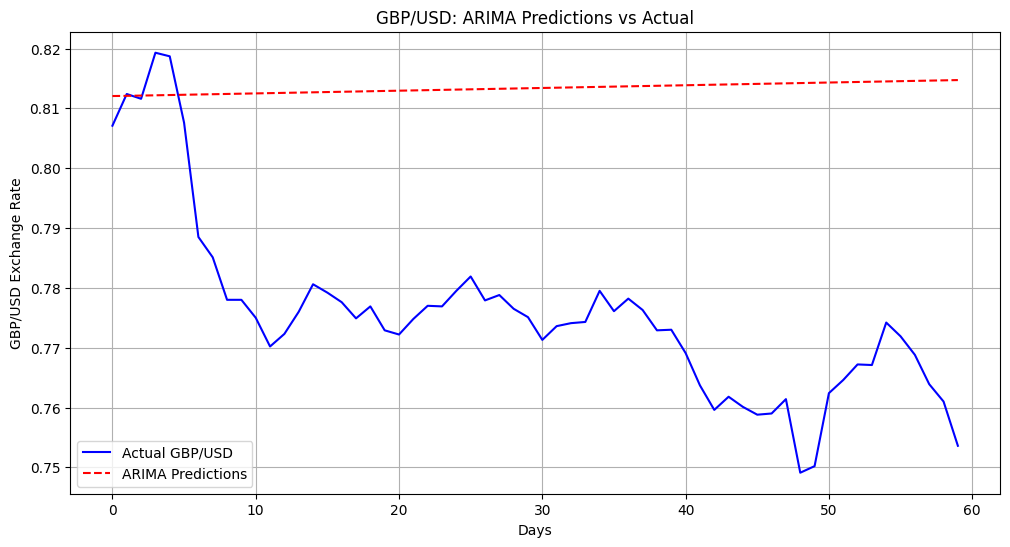

In [65]:
# Convert predicted log returns to price path
last_price = raw_gbp_train.iloc[-1]
gbp_price_predictions = log_returns_to_price_path(gbp_arima_predictions, last_price, "GBP_predicted_price")

# Plot predictions vs actual test data
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(range(len(raw_gbp_test)), raw_gbp_test.values, label='Actual GBP/USD', color='blue')
plt.plot(range(len(gbp_price_predictions)), gbp_price_predictions.values, label='ARIMA Predictions', color='red', linestyle='--')
plt.xlabel('Days')
plt.ylabel('GBP/USD Exchange Rate')
plt.title('GBP/USD: ARIMA Predictions vs Actual')
plt.legend()
plt.grid(True)
plt.show()

In [66]:
# To-do next:
# - Write a reusable evaluation function.
# - Write a reusble modelling function that can iterate over the whole dataset.
# - Save the models.
# - Create a reusable forecast function that can take in a value (e.g from an st.slider) to act as the forecasting period.

In [67]:
#Larger p and q parameters (5):
gbp_arima_model_2 = ARIMA(gbp_returns_train, order=(5,0,5)).fit()

/Users/cameroncochrane/Data Projects/Forex-Prediction/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/cameroncochrane/Data Projects/Forex-Prediction/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/cameroncochrane/Data Projects/Forex-Prediction/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


/Users/cameroncochrane/Data Projects/Forex-Prediction/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/cameroncochrane/Data Projects/Forex-Prediction/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


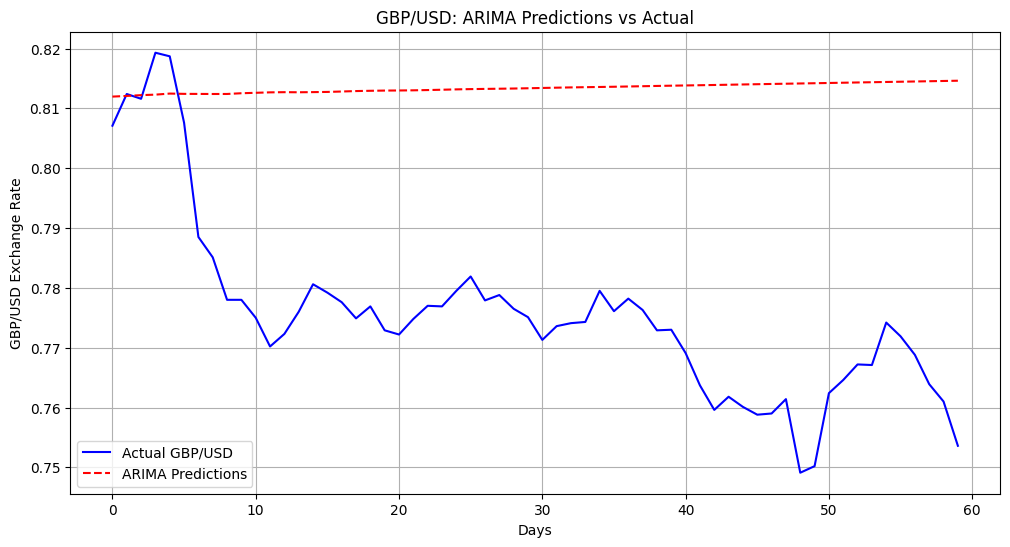

In [68]:
gbp_arima_2_predictions = gbp_arima_model_2.forecast(60)
# Convert predicted log returns to price path
last_price = raw_gbp_train.iloc[-1]
gbp_price_predictions = log_returns_to_price_path(gbp_arima_2_predictions, last_price, "GBP_predicted_price")


plt.figure(figsize=(12, 6))
plt.plot(range(len(raw_gbp_test)), raw_gbp_test.values, label='Actual GBP/USD', color='blue')
plt.plot(range(len(gbp_price_predictions)), gbp_price_predictions.values, label='ARIMA Predictions', color='red', linestyle='--')
plt.xlabel('Days')
plt.ylabel('GBP/USD Exchange Rate')
plt.title('GBP/USD: ARIMA Predictions vs Actual')
plt.legend()
plt.grid(True)
plt.show()

In [69]:
# Train ARIMA model with p and q equal to 100. Computationally not sustainable to use greater than this
train_size = len(gbp_returns_train)
gbp_arima_large_model = ARIMA(gbp_returns_train, order=(20, 0, 20)).fit()

/Users/cameroncochrane/Data Projects/Forex-Prediction/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/cameroncochrane/Data Projects/Forex-Prediction/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/cameroncochrane/Data Projects/Forex-Prediction/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/cam

/Users/cameroncochrane/Data Projects/Forex-Prediction/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/cameroncochrane/Data Projects/Forex-Prediction/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


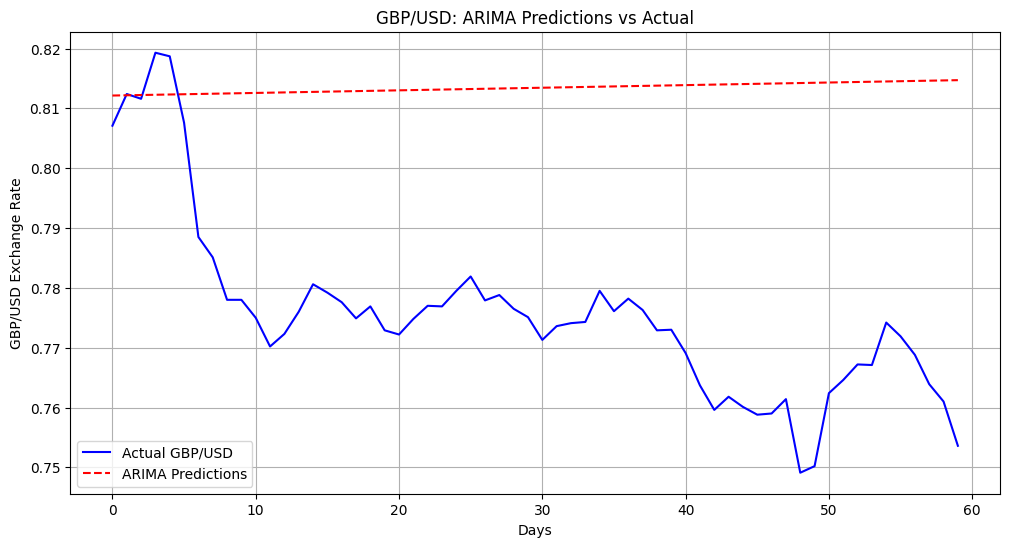

In [70]:
gbp_arima_predictions = gbp_arima_large_model.forecast(60)
# Convert predicted log returns to price path
last_price = raw_gbp_train.iloc[-1]
gbp_price_predictions = log_returns_to_price_path(gbp_arima_predictions, last_price, "GBP_predicted_price")


plt.figure(figsize=(12, 6))
plt.plot(range(len(raw_gbp_test)), raw_gbp_test.values, label='Actual GBP/USD', color='blue')
plt.plot(range(len(gbp_price_predictions)), gbp_price_predictions.values, label='ARIMA Predictions', color='red', linestyle='--')
plt.xlabel('Days')
plt.ylabel('GBP/USD Exchange Rate')
plt.title('GBP/USD: ARIMA Predictions vs Actual')
plt.legend()
plt.grid(True)
plt.show()

In [71]:
data.head()

,Date,EURO/US$,UNITED KINGDOM POUND/US$,YEN/US$,YUAN/US$,AUSTRALIAN DOLLAR/US$
0,2000-01-03,0.9847,0.6146,101.70,8.2798,1.5172
1,2000-01-04,0.9700,0.6109,103.09,8.2799,1.5239
2,2000-01-05,0.9676,0.6092,103.77,8.2798,1.5267
3,2000-01-06,0.9686,0.6070,105.19,8.2797,1.5291
4,2000-01-07,0.9714,0.6104,105.17,8.2794,1.5272


In [72]:
list(country_currency_dict.values())

['EURO/US$',
 'UNITED KINGDOM POUND/US$',
 'YEN/US$',
 'YUAN/US$',
 'AUSTRALIAN DOLLAR/US$']

In [73]:
log_returns_train_data = {}
for item in list(country_currency_dict.values()):
    item_train, item_test = train_test_split_timeseries(data[item]) #create train-test-split for a given column (item) in data
    item_log_train = prep_for_arima_log_returns(item_train)
    log_returns_train_data[item] = item_log_train #Add the log-return of the train data to the dictionary

In [74]:
# Not sure why it's just a straight line? For now, will write a function that trains + returns models based on p and q = 10.
# - Will take in split + processed data as a dictionary to iterate over.

def train_arima_dict(training_dictionary,p=10,q=10):

    currencies = list(training_dictionary.keys())

    ARIMA_models = {}

    for currency in currencies:
        log_d = training_dictionary[currency]
        ARIMA_currency_model = ARIMA(log_d, order=(p, 0, q)).fit()
        ARIMA_models[currency] = ARIMA_currency_model

    return ARIMA_models


In [75]:
c_list = list(country_currency_dict.values())

In [76]:
trained_models = train_arima_dict(log_returns_train_data)

/Users/cameroncochrane/Data Projects/Forex-Prediction/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/cameroncochrane/Data Projects/Forex-Prediction/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/cameroncochrane/Data Projects/Forex-Prediction/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/cam

In [77]:
# Extract a single model e.g. EUR_model:
eur_model = trained_models[c_list[0]]
type(eur_model)

statsmodels.tsa.arima.model.ARIMAResultsWrapper

In [78]:
# Create dictionary mapping currency names to their last training values
training_data_last_values = {}

for currency in c_list:
    # Get the raw currency data and split into train/test
    currency_raw = data[currency]
    currency_train, currency_test = train_test_split_timeseries(currency_raw)
    
    # Get the last value from training data
    last_value = currency_train.iloc[-1]
    training_data_last_values[currency] = last_value

In [79]:
#As a function:

def generate_last_values(train_data,country_currency_dict):
    """
    Find the last values in the training data to allow conversion of forecasted log returns to forecasted prices

    country_currency_dict: Generated when importing the data.
    
    """
    c_list = list(country_currency_dict.values())
    training_data_last_values = {}

    for currency in c_list:
        # Get the last value from training data
        last_value = train_data[currency].iloc[-1]
        training_data_last_values[currency] = last_value
    
    return training_data_last_values

In [80]:
# Test the above function:
train_misc_df,test_misc_df = train_test_split_dataframe(data)
test_last_values = generate_last_values(train_misc_df,country_currency_dict)
test_last_values

{'EURO/US$': np.float64(0.9132),
 'UNITED KINGDOM POUND/US$': np.float64(0.8121),
 'YEN/US$': np.float64(107.21),
 'YUAN/US$': np.float64(7.1473),
 'AUSTRALIAN DOLLAR/US$': np.float64(1.493)}

In [81]:
# Make forecasts

def arima_forecast(model_dict,last_values,forecast_length=60):

    currencies = list(model_dict.keys())
    
    currency_log_forecasts = {}
    currency_price_forecasts = {}

    for currency in currencies:
        m = model_dict[currency]
        currency_log_forecasts[currency] = m.forecast(forecast_length)
        last_price = last_values[currency]
        currency_price_forecasts[currency] = log_returns_to_price_path(currency_log_forecasts[currency], last_price, f"{currency}_predicted_price")
    
    return currency_price_forecasts

In [82]:
price_forecasts = arima_forecast(trained_models,training_data_last_values)

/Users/cameroncochrane/Data Projects/Forex-Prediction/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/cameroncochrane/Data Projects/Forex-Prediction/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/Users/cameroncochrane/Data Projects/Forex-Prediction/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/cameroncochrane/Data Projects/Forex-Prediction/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.

In [83]:
# Convert the price predictions to a dataframe

def price_forecasts_to_dataframe(price_forecasts_dict):
    # Create DataFrame from the dictionary
    df = pd.DataFrame(price_forecasts_dict)
    
    # Reset index to create a forecast period column
    df = df.reset_index()
    df = df.rename(columns={'index': 'forecast_period'})
    
    # Set forecast period as sequential numbers starting from 1
    df['forecast_period'] = range(1, len(df) + 1)
    df = df.set_index('forecast_period')
    
    return df

In [84]:
forecast_df = price_forecasts_to_dataframe(price_forecasts)
forecast_df.head(10)

,EURO/US$,UNITED KINGDOM POUND/US$,YEN/US$,YUAN/US$,AUSTRALIAN DOLLAR/US$
forecast_period,,,,,
1,0.913341,0.811837,107.221386,7.147058,1.492852
2,0.913427,0.811936,107.219230,7.146815,1.492952
3,0.912993,0.811895,107.204500,7.146573,1.492826
4,0.913266,0.811967,107.212511,7.146330,1.492851
5,0.913311,0.812093,107.239603,7.146088,1.492457
6,0.913071,0.812098,107.244935,7.145845,1.492543
7,0.913104,0.812002,107.247075,7.145603,1.492715
8,0.913058,0.812354,107.238481,7.145360,1.492766
9,0.913017,0.812370,107.227395,7.145118,1.492539


In [85]:
def append_forecasts_to_training_data(training_data, forecast_data, forecast_start_date=None):
    """
    Append forecasted prices to the training data with appropriate time index.
    
    Parameters:
    -----------
    training_data : pd.DataFrame
        The training data with Date column and currency price columns
    forecast_data : pd.DataFrame
        The forecasted data (like forecast_df) with forecast_period index
    forecast_start_date : datetime, optional
        Start date for forecasts. If None, uses the day after last training date
    
    Returns:
    --------
    pd.DataFrame
        Combined dataframe with training data + forecasts and sequential index
    """
    
    # Create a copy of training data to avoid modifying original
    training_copy = training_data.copy()
    
    # Drop the Date column from training data
    training_copy = training_copy.drop('Date', axis=1)
    
    # Create forecast dataframe without dates
    forecast_without_dates = forecast_data.copy()
    
    # Append forecasts to training data
    combined_data = pd.concat([training_copy, forecast_without_dates], ignore_index=True)
    
    # Reset index to create sequential numbering from 1
    combined_data.index = range(1, len(combined_data) + 1)
    
    return combined_data


In [86]:
train_dataframe, test_dataframe = train_test_split_dataframe(df = data,test_size=60,date_column='Time Serie')

In [87]:
total_forecasted_data = append_forecasts_to_training_data(train_dataframe, forecast_df)

In [88]:
def reset_index_remove_date(df, date_column='Date'):
    """
    Reset the index and remove the date column from a dataframe.
    
    Parameters:
    -----------
    df : pd.DataFrame
        The dataframe to process
    date_column : str, default='Date'
        Name of the date column to remove
    
    Returns:
    --------
    pd.DataFrame
        Dataframe with date column removed and reset index starting from 1
    """
    # Create a copy to avoid modifying the original
    df_copy = df.copy()
    
    # Drop the date column if it exists
    if date_column in df_copy.columns:
        df_copy = df_copy.drop(columns=[date_column])
    
    # Reset the index to start from 1
    df_copy = df_copy.reset_index(drop=True)
    df_copy.index = range(1, len(df_copy) + 1)
    
    return df_copy

In [89]:
removed_date_data = reset_index_remove_date(data)
removed_date_data

,EURO/US$,UNITED KINGDOM POUND/US$,YEN/US$,YUAN/US$,AUSTRALIAN DOLLAR/US$
1,0.9847,0.6146,101.70,8.2798,1.5172
2,0.9700,0.6109,103.09,8.2799,1.5239
3,0.9676,0.6092,103.77,8.2798,1.5267
4,0.9686,0.6070,105.19,8.2797,1.5291
5,0.9714,0.6104,105.17,8.2794,1.5272
...,...,...,...,...,...
5015,0.9022,0.7719,109.38,7.0064,1.4445
5016,0.9007,0.7688,109.67,6.9949,1.4411
5017,0.8949,0.7639,109.47,6.9954,1.4331
5018,0.8915,0.7610,108.85,6.9864,1.4278


In [90]:
# Forecasted data (last 10 values)
total_forecasted_data.tail(10)

,EURO/US$,UNITED KINGDOM POUND/US$,YEN/US$,YUAN/US$,AUSTRALIAN DOLLAR/US$
5010,0.912153,0.814369,107.264247,7.134944,1.492171
5011,0.912037,0.814444,107.266123,7.134701,1.492140
5012,0.912003,0.814497,107.266746,7.134459,1.492150
5013,0.912079,0.814528,107.266404,7.134217,1.492172
5014,0.911976,0.814543,107.266150,7.133975,1.492162
5015,0.911924,0.814548,107.266811,7.133733,1.492133
5016,0.912004,0.814550,107.268476,7.133491,1.492117
5017,0.911915,0.814557,107.270326,7.133249,1.492106
5018,0.911846,0.814577,107.271524,7.133007,1.492086
5019,0.911927,0.814616,107.271779,7.132765,1.492065


In [91]:
# True data (last 10 values)
removed_date_data.tail(10)

,EURO/US$,UNITED KINGDOM POUND/US$,YEN/US$,YUAN/US$,AUSTRALIAN DOLLAR/US$
5010,0.8970,0.7624,109.52,6.9967,1.4605
5011,0.8998,0.7646,109.58,7.0029,1.4590
5012,0.8986,0.7672,109.23,7.0097,1.4520
5013,0.9029,0.7671,109.45,7.0063,1.4489
5014,0.9016,0.7742,109.39,7.0124,1.4457
5015,0.9022,0.7719,109.38,7.0064,1.4445
5016,0.9007,0.7688,109.67,6.9949,1.4411
5017,0.8949,0.7639,109.47,6.9954,1.4331
5018,0.8915,0.7610,108.85,6.9864,1.4278
5019,0.8907,0.7536,108.67,6.9618,1.4225


In [92]:
print(data.shape)
print(total_forecasted_data.shape)
print(train_dataframe.shape)

(5019, 6)
(5019, 5)
(4959, 6)


In [93]:
train_data_df = reset_index_remove_date(train_dataframe)
train_data_df

,EURO/US$,UNITED KINGDOM POUND/US$,YEN/US$,YUAN/US$,AUSTRALIAN DOLLAR/US$
1,0.9847,0.6146,101.70,8.2798,1.5172
2,0.9700,0.6109,103.09,8.2799,1.5239
3,0.9676,0.6092,103.77,8.2798,1.5267
4,0.9686,0.6070,105.19,8.2797,1.5291
5,0.9714,0.6104,105.17,8.2794,1.5272
...,...,...,...,...,...
4955,0.9142,0.8102,107.67,7.1300,1.4806
4956,0.9139,0.8122,108.05,7.1218,1.4784
4957,0.9170,0.8127,108.11,7.1477,1.4824
4958,0.9147,0.8169,107.70,7.1473,1.4919


In [94]:
# Indexes and dates are off. The sizes are ok though

In [95]:
def replace_date_with_index(df, date_column='Date'):
    """
    Replace the date/time column with a sequential index column.
    
    Parameters:
    -----------
    df : pd.DataFrame
        The dataframe containing a date/time column
    date_column : str, default='Date'
        Name of the date column to remove
    
    Returns:
    --------
    pd.DataFrame
        Dataframe with date column removed and reset index
    """
    # Create a copy to avoid modifying the original
    df_copy = df.copy()
    
    # Drop the date column if it exists
    if date_column in df_copy.columns:
        df_copy = df_copy.drop(columns=[date_column])
    
    # Reset the index to create a sequential index
    df_copy = df_copy.reset_index(drop=True)
    
    return df_copy

Saving and Loading ARIMA Models:

In [96]:
# Save the models in the models dictionary to a 'models' directory, and return a dictionary of the currency names and corresponding model file names
import pickle
import os

def save_trained_models(trained_models_dict, save_directory="models"):
    """
    Save trained ARIMA models to pickle files.
    
    Parameters:
    -----------
    trained_models_dict : dict
        Dictionary containing trained models with currency names as keys
    save_directory : str, default="models"
        Directory to save the model files
    
    Returns:
    --------
    dict: Dictionary mapping currency names to their saved file paths
    """
    
    # Create directory if it doesn't exist
    os.makedirs(save_directory, exist_ok=True)
    
    saved_files = {}
    
    for currency_name, model in trained_models_dict.items():
        # Clean currency name for filename (replace special characters)
        clean_name = currency_name.replace("/", "_").replace("$", "").replace(" ", "_")
        filename = f"{clean_name}_arima_model.pkl"
        filepath = os.path.join(save_directory, filename)
        
        # Save model using pickle
        with open(filepath, 'wb') as f:
            pickle.dump(model, f)
        
        saved_files[currency_name] = filepath
        print(f"Saved {currency_name} model to {filepath}")
    
    return saved_files

In [97]:
saved_arima_files = save_trained_models(trained_models)

Saved EURO/US$ model to models/EURO_US_arima_model.pkl
Saved UNITED KINGDOM POUND/US$ model to models/UNITED_KINGDOM_POUND_US_arima_model.pkl
Saved YEN/US$ model to models/YEN_US_arima_model.pkl
Saved YUAN/US$ model to models/YUAN_US_arima_model.pkl
Saved AUSTRALIAN DOLLAR/US$ model to models/AUSTRALIAN_DOLLAR_US_arima_model.pkl


In [105]:
saved_arima_files

{'EURO/US$': 'models/EURO_US_arima_model.pkl',
 'UNITED KINGDOM POUND/US$': 'models/UNITED_KINGDOM_POUND_US_arima_model.pkl',
 'YEN/US$': 'models/YEN_US_arima_model.pkl',
 'YUAN/US$': 'models/YUAN_US_arima_model.pkl',
 'AUSTRALIAN DOLLAR/US$': 'models/AUSTRALIAN_DOLLAR_US_arima_model.pkl'}

In [98]:
# For the streamlit app, we won't have to do any model training + saving, only loading + making predictions,
# then displaying those predictions.

In [99]:
# Loading the saved models (pkl file -> model):

def load_saved_models(saved_files_dict):
    """
    Load saved ARIMA models from pickle files.
    
    Parameters:
    -----------
    saved_files_dict : dict
        Dictionary mapping currency names to their saved file paths
        (output from save_trained_models function)
    
    Returns:
    --------
    dict: Dictionary containing loaded models with currency names as keys
    """
    
    loaded_models = {}
    
    for currency_name, filepath in saved_files_dict.items():
        try:
            with open(filepath, 'rb') as f:
                model = pickle.load(f)
            loaded_models[currency_name] = model
            print(f"Successfully loaded {currency_name} model from {filepath}")
        except FileNotFoundError:
            print(f"Error: Could not find file {filepath} for {currency_name}")
        except Exception as e:
            print(f"Error loading {currency_name} model: {str(e)}")
    
    return loaded_models

In [100]:
loaded_models = load_saved_models(saved_arima_files)

Successfully loaded EURO/US$ model from models/EURO_US_arima_model.pkl
Successfully loaded UNITED KINGDOM POUND/US$ model from models/UNITED_KINGDOM_POUND_US_arima_model.pkl
Successfully loaded YEN/US$ model from models/YEN_US_arima_model.pkl
Successfully loaded YUAN/US$ model from models/YUAN_US_arima_model.pkl
Successfully loaded AUSTRALIAN DOLLAR/US$ model from models/AUSTRALIAN_DOLLAR_US_arima_model.pkl


In [101]:
loaded_models

{'EURO/US$': <statsmodels.tsa.arima.model.ARIMAResultsWrapper at 0x122d0e660>,
 'UNITED KINGDOM POUND/US$': <statsmodels.tsa.arima.model.ARIMAResultsWrapper at 0x122e64560>,
 'YEN/US$': <statsmodels.tsa.arima.model.ARIMAResultsWrapper at 0x122cf0da0>,
 'YUAN/US$': <statsmodels.tsa.arima.model.ARIMAResultsWrapper at 0x122f1da30>,
 'AUSTRALIAN DOLLAR/US$': <statsmodels.tsa.arima.model.ARIMAResultsWrapper at 0x122f1fd10>}

Model Evaluation

In [102]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

def evaluate_arima_performance(forecast_df, test_df, currency_columns=None):
    """
    Evaluate ARIMA model performance by calculating MAE, RMSE, and MAPE
    between forecasted and actual test data.
    
    Parameters:
    -----------
    forecast_df : pd.DataFrame
        DataFrame containing forecasted values with currency columns
    test_df : pd.DataFrame
        DataFrame containing actual test values with same currency columns
    currency_columns : list, optional
        List of currency column names to evaluate. If None, uses all columns except 'Date'
    
    Returns:
    --------
    dict: Dictionary containing evaluation metrics for each currency
          Format: {currency: {'MAE': value, 'RMSE': value, 'MAPE': value}}
    """
    
    # If no currency columns specified, use all columns except 'Date'
    if currency_columns is None:
        currency_columns = [col for col in forecast_df.columns if col != 'Date']
    
    evaluation_results = {}
    
    for currency in currency_columns:
        if currency in forecast_df.columns and currency in test_df.columns:
            # Extract actual and predicted values
            actual = test_df[currency].values
            predicted = forecast_df[currency].values
            
            # Ensure same length (take minimum length if different)
            min_length = min(len(actual), len(predicted))
            actual = actual[:min_length]
            predicted = predicted[:min_length]
            
            # Calculate metrics
            mae = mean_absolute_error(actual, predicted)
            rmse = np.sqrt(mean_squared_error(actual, predicted))
            
            # Calculate MAPE (Mean Absolute Percentage Error)
            # Avoid division by zero
            mape = np.mean(np.abs((actual - predicted) / np.where(actual != 0, actual, 1))) * 100
            
            evaluation_results[currency] = {
                'MAE': mae,
                'RMSE': rmse,
                'MAPE': mape
            }
        else:
            print(f"Warning: Currency {currency} not found in both dataframes")
    
    return evaluation_results

In [103]:
ARIMA_evaluate = evaluate_arima_performance(forecast_df, test_dataframe, currency_columns=None)

In [104]:
ARIMA_evaluate

{'EURO/US$': {'MAE': 0.009957149364877156,
  'RMSE': np.float64(0.010996908014069768),
  'MAPE': np.float64(1.105930134537486)},
 'UNITED KINGDOM POUND/US$': {'MAE': 0.03838004508107986,
  'RMSE': np.float64(0.040951711512972486),
  'MAPE': np.float64(4.985081113788383)},
 'YEN/US$': {'MAE': 1.513695143363108,
  'RMSE': np.float64(1.6067158357975264),
  'MAPE': np.float64(1.389392212308428)},
 'YUAN/US$': {'MAE': 0.09855086782472379,
  'RMSE': np.float64(0.10650120580903492),
  'MAPE': np.float64(1.4031846113280215)},
 'AUSTRALIAN DOLLAR/US$': {'MAE': 0.03066994260891927,
  'RMSE': np.float64(0.03343680237093463),
  'MAPE': np.float64(2.1067599574070885)}}

## Functions Summary

Below is a comprehensive list of all the functions created in this notebook and their purposes:

### Data Processing Functions
- **`load_and_process_forex_data()`** - Loads and preprocesses the raw forex data from Excel file, handles missing values, cleans column names, and converts data types
- **`prep_for_arima_log_returns(prices)`** - Converts price series to log returns for ARIMA modeling (makes data stationary)
- **`log_returns_to_price_path(predicted_log_returns, last_close, start_price_name)`** - Converts predicted log returns back to price forecasts

### Data Splitting Functions
- **`train_test_split_timeseries(series, test_size=60)`** - Splits a single time series into training and test sets
- **`train_test_split_dataframe(df, test_size=60, date_column='Date')`** - Splits a dataframe with multiple time series into train/test sets
- **`replace_date_with_index(df, date_column='Date')`** - Removes date column and creates sequential index
- **`reset_index_remove_date(df, date_column='Date')`** - Resets index and removes date column from dataframe

### Model Training & Forecasting Functions
- **`train_arima_dict(training_dictionary, p=10, q=10)`** - Trains ARIMA models for multiple currencies using specified parameters
- **`arima_forecast(model_dict, last_values, forecast_length=60)`** - Generates price forecasts using trained ARIMA models
- **`price_forecasts_to_dataframe(price_forecasts_dict)`** - Converts price forecast dictionary to structured dataframe

### Data Combination Functions
- **`append_forecasts_to_training_data(training_data, forecast_data, forecast_start_date=None)`** - Combines training data with forecasted values for visualization

### Model Persistence Functions
- **`save_trained_models(trained_models_dict, save_directory="models")`** - Saves trained ARIMA models to pickle files
- **`load_saved_models(saved_files_dict)`** - Loads previously saved ARIMA models from pickle files

### Model Evaluation Functions
- **`evaluate_arima_performance(forecast_df, test_df, currency_columns=None)`** - Calculates performance metrics (MAE, RMSE, MAPE) for model evaluation